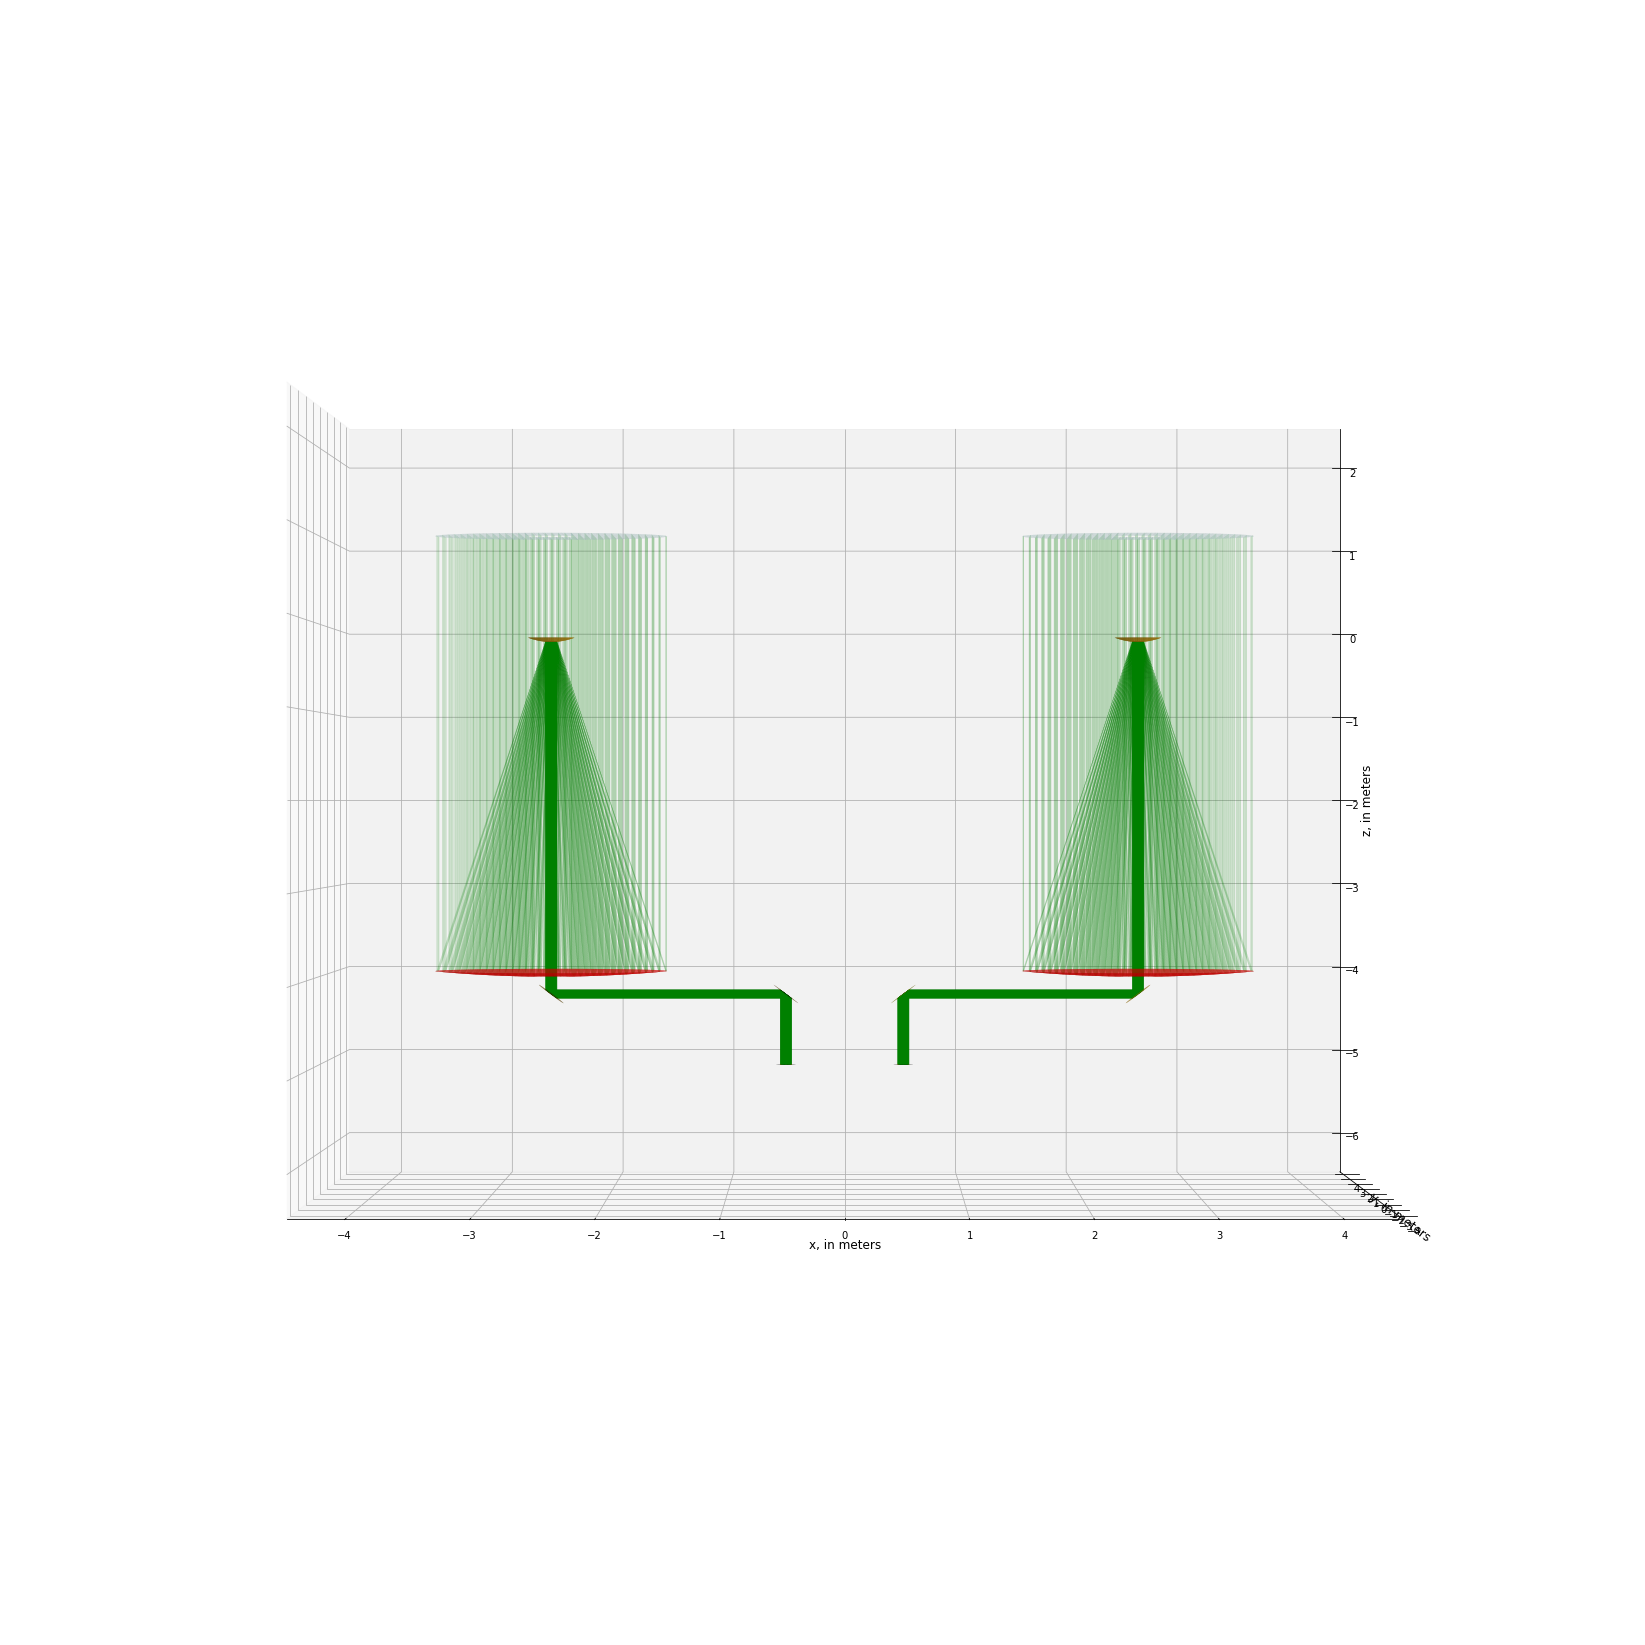

In [335]:
import pimms.optics as op
import copy
reload(op)
m0=op.SymmetricQuadricMirror(0.4, 2.,  f=np.inf, g=np.inf, b=(-1,-1),p=(0,0,1))
m1=op.SymmetricQuadricMirror(0.3, 2.,  f=4.0,    g=np.inf, b=(1,1))
m2=op.SymmetricQuadricMirror(0.,  0.4, f=0.2,    g=np.inf, b=(1,1))
m3=op.SymmetricQuadricMirror(0.,  0.3, f=np.inf, g=np.inf, b=(1,1), p=( 0., 0, -4.2), q=op.quat.from_angles(0., np.pi/4.))
m4=op.SymmetricQuadricMirror(0.,  0.3, f=np.inf, g=np.inf, b=(1,1), p=(-2., 0, -4.2), q=op.quat.from_angles(0., np.pi/4.))
d1=op.Detector(0.12, 64, p=(-2., 0, -5.))
m0.is_virtual=True
m0.is_entrance=True
m1.is_primary=True
assembly=op.OpticalAssembly()
assembly.add_part(m0)
assembly.add_part(m1)
assembly.add_part(m2)
assembly.add_part(m3)
assembly.add_part(m4)
assembly.add_part(d1)
new_assembly=copy.deepcopy(assembly)
assembly.move([2.5,0,0])
new_assembly.rotate(op.quat.from_angles(np.pi, 0.))
new_assembly.move([-2.5,0,0])
assembly.join(new_assembly)
del new_assembly
s=op.LightSource((np.pi,np.deg2rad(1e-1/3600.),np.inf))
p,q=s(assembly.get_entrance(), 1000, 1, sampling='dizzle')
trace,seq=assembly.trace(q,steps=6)
fig=plt.figure(figsize=(30,30))
ax=fig.add_subplot(111,projection='3d')
trigs,zs,extent=assembly.draw(axes=ax,draw_virtual=True,raytrace=trace,view_angles=(0, -90))

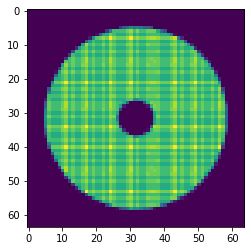

In [337]:
dets=assembly.get_detectors()
dets[0].photon_buffer=np.empty((0,),dtype=op.sptype)
for i in range(4):
    p,q=s(assembly.get_entrance(), 10000, 1., sampling='dizzle')
    trace,seq=assembly.trace(q,steps=6)
plt.imshow(dets[0].readout(clear_buffer=False)[0])

In [253]:
q.size

19974

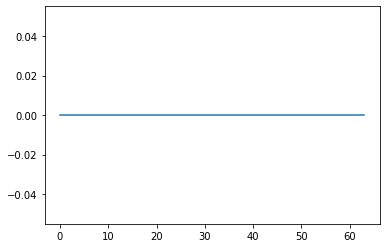

In [170]:
plt.plot(dets[0].readout(clear_buffer=False)[0][32,:])

In [139]:
dets[0].readout(clear_buffer=False)[0].sum()

860254.9581251761

In [141]:
dets[0].photon_buffer['weight'].size

3110719

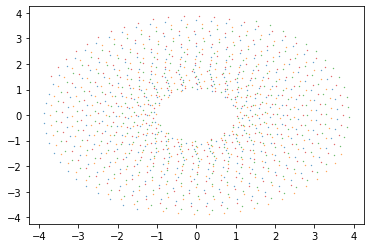

In [158]:
rho0=np.arange(1,4,0.01)
dphi0=np.pi*(16-1)/4/300/0.1/rho0
phi0=np.cumsum(dphi0)
x0=rho0*np.cos(phi0)
y0=rho0*np.sin(phi0)
phi1=np.cumsum(dphi0)+np.pi/2.
x1=rho0*np.cos(phi1)
y1=rho0*np.sin(phi1)
phi2=np.cumsum(dphi0)+np.pi
x2=rho0*np.cos(phi2)
y2=rho0*np.sin(phi2)
phi3=np.cumsum(dphi0)+3.*np.pi/2.
x3=rho0*np.cos(phi3)
y3=rho0*np.sin(phi3)
plt.scatter(x0,y0,s=.1)
plt.scatter(x1,y1,s=.1)
plt.scatter(x2,y2,s=.1)
plt.scatter(x3,y3,s=.1)

In [147]:
np.cumsum(np.arange(4))

array([0, 1, 3, 6])